In [1]:
!pip install fastai

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import cv2
import os
import PIL
import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

In [3]:
data_dir = pathlib.Path(r'C:\Users\emrek\yapay zeka\homeworks\Project Based Learning Level 2\Image Classification with CNN for Malaria Data\cell_images\cell_images')

In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

26186


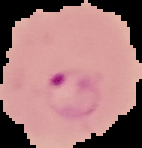

In [5]:
parasitized = list(data_dir.glob('Parasitized/*'))
PIL.Image.open(str(parasitized[0]))

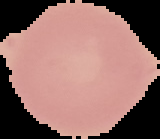

In [6]:
uninfected = list(data_dir.glob('Uninfected/*'))
PIL.Image.open(str(uninfected[0]))

In [7]:
batch_size = 128
img_height = 150
img_width = 150

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26186 files belonging to 2 classes.
Using 20949 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26186 files belonging to 2 classes.
Using 5237 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

['Parasitized', 'Uninfected']


In [10]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000236982E29A0>>

In [11]:
model.fit(train_ds, validation_data=val_ds,epochs=10, verbose=1)

Epoch 1/10
164/164 [==============================] - 311s 2s/step - loss: 0.6231 - accuracy: 0.6657 - val_loss: 0.4677 - val_accuracy: 0.8255
Epoch 2/10
164/164 [==============================] - 261s 2s/step - loss: 0.2841 - accuracy: 0.9079 - val_loss: 0.2190 - val_accuracy: 0.9362
Epoch 3/10
164/164 [==============================] - 222s 1s/step - loss: 0.1876 - accuracy: 0.9382 - val_loss: 0.1747 - val_accuracy: 0.9452
Epoch 4/10
164/164 [==============================] - 222s 1s/step - loss: 0.1630 - accuracy: 0.9474 - val_loss: 0.1629 - val_accuracy: 0.9483
Epoch 5/10
164/164 [==============================] - 222s 1s/step - loss: 0.1385 - accuracy: 0.9540 - val_loss: 0.1599 - val_accuracy: 0.9507
Epoch 6/10
164/164 [==============================] - 225s 1s/step - loss: 0.1276 - accuracy: 0.9558 - val_loss: 0.1486 - val_accuracy: 0.9513
Epoch 7/10
164/164 [==============================] - 222s 1s/step - loss: 0.1148 - accuracy: 0.9603 - val_loss: 0.1488 - val_accuracy: 0.9526